In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math as math
import scipy
from scipy.stats import norm

In [2]:
import matplotlib
print(matplotlib.__version__)

3.1.1


In [17]:
# Plots a histogram of the raw data and finds key statistics of the data

def histogramCalc(data, small_length, length): 
    
    # Grab the data
    data.columns
    a = np.array(data['X at Max Y(1)'])
    b = np.array(data['X at Max Y(4)'])

    
    # delete the largest argument from both datasets
    argument1 = np.where(a > np.quantile(a, 0.99))
    argument3 = np.where(a < np.quantile(a,0.01))
    argument2 = np.where(b > np.quantile(b, 0.99))
    argument4 = np.where(b < np.quantile(b,0.01))
    
    del_args = np.append(argument1, np.append(argument2, np.append(argument3, argument4)))
    #print(del_args)
    
    c = np.delete(a, del_args)

    d = np.delete(b, del_args)

    # create an array of the difference between the new datasets
    e = []
    for i in range(len(c)):
        e.append(c[i] - d[i])

        
    e = np.array(e)
    
    #del_args = np.where(e > np.quantile(e, 0.999))
    #e = np.delete(e, del_args)
    
    #print(e)
    #print(len(e))

    # Create plot
    plt.xlabel("DELAY. SGB-BCF92. " + str(small_length) + "mm")
    plt.ylabel("Frequency")
    #vx = np.random.gamma(4, 0.5, 1000) idk what this is for
    plt.axvline(e.mean(),color='k', linestyle='dashed', linewidth=1)
    
    mu, std = norm.fit(e) # find the mean & std of the data fitted to a norm. dist.

    plt.hist(e, density=True, alpha=0.6, color='b')

    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
  
    plt.plot(x, p, 'k', linewidth=2)
    title = "Fit Values: {:.2f} and {:.2f}".format(mu, std)

    plt.show()

    mean_rounded = "{:.3f}".format((np.mean(e)) * 10 ** 9)
    sr_rounded = "{:.3f}".format((np.std(e)) * 10 ** 9)
    median_rounded = "{:.3f}".format((np.median(e)) * 10 ** 9)
    
    mean = "Mean: " + str(mean_rounded) + " ns"
    SD = "Standard Deviation: " + str(sr_rounded) + " ns"
    median = "Median: " + str(median_rounded) + " ns"
    
    print(mean)
    print(SD)
    print(median)
    #return a,b,c,d,e

In [18]:
def get_all_values(data):
    delay = np.array(data['X at Max Y(1)'])
    L = []
    for val in delay:
        if val not in L:
            L.append(val)
    
    L.sort()

    return L

In [19]:
def histogram_justCalc(str1, str2, small_lengths, length):
    dic = {}
    i = 2
    for small_length in small_lengths:
        data_name = str1 + str(i) + str2
        # print(data_name)
        data = pd.read_csv(data_name, low_memory=False)
        data.columns
        a = np.array(data['X at Max Y(1)'])
        b = np.array(data['X at Max Y(4)'])


        e = b - a

        print(e)
        print(len(e))


        mean = "{:.3f}".format((np.mean(e)) * (10**9))
        SD = "{:.3f}".format((np.std(e)) * (10**9))
        median = "{:.3f}".format((np.median(e)) * (10**9))
        
        
        
        distance = length - 2*(small_length)
        
        spofl = 299792458
        # velocity = ((distance/1000) / ((np.mean(a)) - offset))
        velocity = ((distance/1000) / ((np.mean(e))))
        percentage = abs((velocity / spofl) * 100)

        dic[small_length] = [mean, SD, median, percentage]
        i += 1
    return dic

In [20]:
def offset(d, midvalue, distance):
    for k in d.keys():
        # print(d[k])
        d[k][0] = float(d[k][0]) - d[midvalue][0]
        if (d[k][0] != 0):
            d[k][3] = abs((((distance - 2*k) / d[k][0]) / 299792458)*10000000000)

    return d

In [21]:
def makefloat(d):
    for k in d.keys():
        for i in range(len(d[k]) - 1):
            d[k][i] = float(d[k][i])

    return d

In [22]:
def plot_delay_ov_distance(d, distance):
    x1 = []
    y1 = []

    for k in d.keys():
        x1.append(k)
        y1.append(d[k][0])
        # print(d[k][3])

    coef_1 = np.polyfit(x1,y1,1)
    print(coef_1)
    poly1d_fn_1 = np.poly1d(coef_1) 

    midval = poly1d_fn_1(1500)

    print(midval)
    
    for k in d.keys():
        # print(d[k])
        d[k][0] = float(d[k][0]) - midval
        if (d[k][0] != 0):
            d[k][3] = abs((((distance - 2*k) / d[k][0]) / 299792458)*10000000000)

    

    # d = offset(d)

    x2 = []
    y2 = []

    for k in d.keys():
        x2.append(k)
        y2.append(d[k][0])
        # print(d[k][3])

    coef_2 = np.polyfit(x2,y2,1)
    print(coef_2)
    poly1d_fn_2 = np.poly1d(coef_2) 
    # poly1d_fn is now a function which takes in x and returns an estimate for y

    plt.plot(x1, y1, 'bo', x2, y2, 'ro', x1, poly1d_fn_1(x1), '--y', x2, poly1d_fn_2(x2), '--k') #'--k'=black dashed line, 'yo' = yellow circle marker
    plt.xlabel("Distance from LED Pulse (mm)")
    plt.ylabel("Delay between SiPM activations, ns")
    plt.legend(["Original Data", "Adjusted Data"])
    plt.show()

In [23]:
def plot_sd_ov_distance(d):
    x1 = []
    y1 = []

    for k in d.keys():
        x1.append(k)
        y1.append(d[k][1])
        # print(d[k][3])

    coef_1 = np.polyfit(x1,y1,1)
    # print(coef_1)
    poly1d_fn_1 = np.poly1d(coef_1)
    # poly1d_fn is now a function which takes in x and returns an estimate for y


    plt.plot(x1, y1, 'bo')
    # plt.plot(x1, y1, 'bo', x1, poly1d_fn_1(x1), '--y') #'--k'=black dashed line, 'yo' = yellow circle marker
    plt.xlabel("Distance from LED Pulse (mm)")
    plt.ylabel("Standard Deviation of the Delay values, ns")
    plt.show()

In [24]:
def avg_SD(data):
    total = 0
    for key in data.keys():
        total += data[key][1]

    return total / len(data.keys())
    

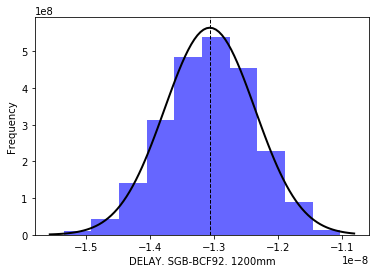

Mean: -13.068 ns
Standard Deviation: 0.707 ns
Median: -13.050 ns


In [25]:
data = pd.read_csv("XaM_DEL_SGB-BCF-1-2_R1.csv")
#data2 = pd.read_csv("test_lana.csv")
#data3 = pd.read_csv("test_lana2.csv")
#data2 = pd.read_csv("XaM_DEL_SGB-BCF-1-2_R2.csv")
#data3 = pd.read_csv("XaM_DEL_SGB-BCF-1-2_R3.csv")
#data4 = pd.read_csv("XaM_DEL_SGB-BCF-1-2_R4.csv")
#data5 = pd.read_csv("XaM_DEL_SGB-BCF-1-2_R5.csv")


histogramCalc(data, 1200, 3000)
#histogramCalc(data2, 1200, 3000)
#histogramCalc(data3, 1200, 3000)
#histogramCalc(data4, 1200, 3000)
#histogramCalc(data5, 1200, 3000)


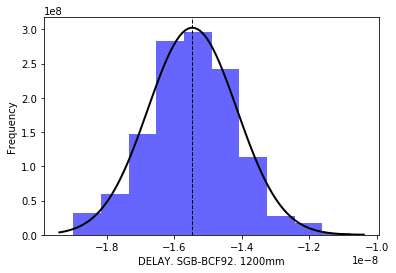

Mean: -15.470 ns
Standard Deviation: 1.320 ns
Median: -15.500 ns


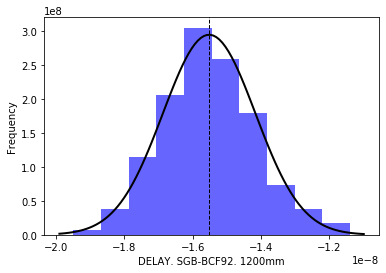

Mean: -15.522 ns
Standard Deviation: 1.355 ns
Median: -15.600 ns


In [12]:
test1 = pd.read_csv("test_lana.csv")
test2 = pd.read_csv("test_lana2.csv")


histogramCalc(test1, 1200, 3000)
histogramCalc(test2, 1200, 3000)

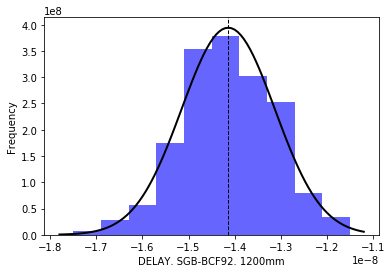

Mean: -14.140 ns
Standard Deviation: 1.012 ns
Median: -14.200 ns


In [13]:
test3 = pd.read_csv("test3lana.csv")


histogramCalc(test3, 1200, 3000)

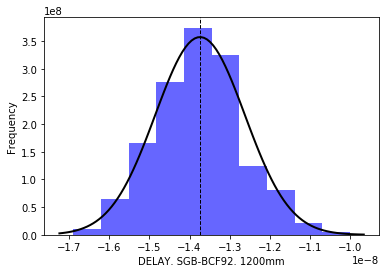

Mean: -13.738 ns
Standard Deviation: 1.117 ns
Median: -13.700 ns


In [14]:
# TODAY'S RUN
lana_test_1_0914 = pd.read_csv("test-0914-lana-1.CSV")

histogramCalc(lana_test_1_0914, 1200, 3000)


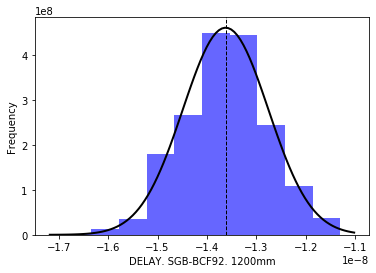

Mean: -13.622 ns
Standard Deviation: 0.864 ns
Median: -13.600 ns


In [15]:
lana_test_1_0914 = pd.read_csv("lana_test_2_0914.csv")

histogramCalc(lana_test_1_0914, 1200, 3000)